In [ ]:
# For data reading
import pandas as pd 

# For reading the array 
import numpy as np

# For visualize the data and plottting parameters :
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,108]
import seaborn as sns
import statsmodels.api as sm
from statsmodels.api import OLS
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

from plotly.subplots import make_subplots
import plotly.graph_objects as go

# For data reading | manipulation :
import pandas as pd 

# For reading the array :
import numpy as np

# For visualize the data and plottting patameters :
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,8]
import seaborn as sns

# To suppress warnings :
from warnings import filterwarnings
filterwarnings('ignore')

# Import train-test split :
from sklearn.model_selection import train_test_split

# Import 'stats' libraries for modeling :
from scipy import stats
import statsmodels.api as sm
from statsmodels.api import OLS

# To scaled the data :
from sklearn.preprocessing import StandardScaler


from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler # Scaling
import math
from sklearn.metrics import  r2_score
from sklearn.model_selection import GridSearchCV
import scipy.stats as stats

from sklearn.preprocessing import PowerTransformer
from sklearn import metrics

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###Filling missing values

In [ ]:
# Reading data :
ozone = pd.read_csv('/content/drive/Othercomputers/My Laptop/MTech/Project/New/pollutants/Daily_data/nagpur/ozone_1.csv')
satozone=pd.read_csv('/content/drive/Othercomputers/My Laptop/MTech/Project/New/relationship/nagpur/Ozone.csv')


In [ ]:
ozone

,Date,T2M,PRECTOTCORR,PS,RH2M,WS10M,WD10M,Ozone
0,01-01-16,23.26,0.00,98.55,35.38,1.84,144.25,NaN
1,02-01-16,23.38,0.00,98.53,33.19,1.52,137.00,NaN
2,03-01-16,21.19,0.00,98.45,32.56,2.90,62.69,NaN
3,04-01-16,20.94,0.00,98.51,35.06,2.67,86.00,NaN
4,05-01-16,21.66,0.00,98.41,30.44,1.73,108.44,NaN
...,...,...,...,...,...,...,...,...
1456,27-12-19,15.15,0.07,98.29,59.81,4.29,21.38,31.131667
1457,28-12-19,11.83,0.00,98.43,57.94,3.41,68.00,38.072174
1458,29-12-19,12.38,0.00,98.43,58.62,2.76,64.56,32.526667
1459,30-12-19,14.22,0.10,98.35,66.81,2.78,75.00,28.711364


In [ ]:
satozone

,Date,Satellite,converted,CPCB,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,01-01-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02-01-16,32.130629,64.261258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,03-01-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,slope:,-11.472408
3,04-01-16,31.897798,63.795596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y-intercept,638.389076
4,05-01-16,32.043317,64.086635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1456,27-12-19,NaN,NaN,31.131667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1457,28-12-19,NaN,NaN,38.072174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1458,29-12-19,NaN,NaN,32.526667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1459,30-12-19,NaN,NaN,28.711364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
extracted_col=satozone['converted ']

ozone=ozone.join(extracted_col)

extracted_col1=satozone['CPCB']
ozone=ozone.join(extracted_col1)



In [ ]:
ozone

,Date,T2M,PRECTOTCORR,PS,RH2M,WS10M,WD10M,Ozone,converted,CPCB
0,01-01-16,23.26,0.00,98.55,35.38,1.84,144.25,NaN,NaN,NaN
1,02-01-16,23.38,0.00,98.53,33.19,1.52,137.00,NaN,64.261258,NaN
2,03-01-16,21.19,0.00,98.45,32.56,2.90,62.69,NaN,NaN,NaN
3,04-01-16,20.94,0.00,98.51,35.06,2.67,86.00,NaN,63.795596,NaN
4,05-01-16,21.66,0.00,98.41,30.44,1.73,108.44,NaN,64.086635,NaN
...,...,...,...,...,...,...,...,...,...,...
1456,27-12-19,15.15,0.07,98.29,59.81,4.29,21.38,31.131667,NaN,31.131667
1457,28-12-19,11.83,0.00,98.43,57.94,3.41,68.00,38.072174,NaN,38.072174
1458,29-12-19,12.38,0.00,98.43,58.62,2.76,64.56,32.526667,NaN,32.526667
1459,30-12-19,14.22,0.10,98.35,66.81,2.78,75.00,28.711364,NaN,28.711364


In [ ]:
#finding % of the missing values in each coloumn
nullValues = ozone.isnull().sum()
nullValues

Date             0
T2M              0
PRECTOTCORR      0
PS               0
RH2M             0
WS10M            0
WD10M            0
Ozone          507
converted      537
CPCB           507
dtype: int64

In [ ]:
ozone_new=ozone['Ozone'].fillna((-0.79)*ozone['converted ']+91)

ozone_new

0             NaN
1       40.233606
2             NaN
3       40.601479
4       40.371559
          ...    
1456    31.131667
1457    38.072174
1458    32.526667
1459    28.711364
1460    40.805000
Name: Ozone, Length: 1461, dtype: float64

In [ ]:
ozone_interpolate=ozone_new.interpolate()

ozone_interpolate

0             NaN
1       40.233606
2       40.417543
3       40.601479
4       40.371559
          ...    
1456    31.131667
1457    38.072174
1458    32.526667
1459    28.711364
1460    40.805000
Name: Ozone, Length: 1461, dtype: float64

In [ ]:
ozone_interpolate=ozone_interpolate.bfill()

In [ ]:
nullValues = ozone_interpolate.isnull().sum()
nullValues

0

In [ ]:
ozone_interpolate.to_csv('filled.csv', index=False)

###Train test split

In [ ]:
ozone = pd.read_csv('/content/drive/Othercomputers/My Laptop/MTech/Project/New/processed_data/nagpur/ozone.csv')

In [ ]:
ozone

,Date,T2M,PRECTOTCORR,PS,RH2M,WS10M,WD10M,Ozone
0,01-01-16,23.26,0.00,98.55,35.38,1.84,144.25,40.233607
1,02-01-16,23.38,0.00,98.53,33.19,1.52,137.00,40.233607
2,03-01-16,21.19,0.00,98.45,32.56,2.90,62.69,40.417543
3,04-01-16,20.94,0.00,98.51,35.06,2.67,86.00,40.601479
4,05-01-16,21.66,0.00,98.41,30.44,1.73,108.44,40.371559
...,...,...,...,...,...,...,...,...
1456,27-12-19,15.15,0.07,98.29,59.81,4.29,21.38,31.131667
1457,28-12-19,11.83,0.00,98.43,57.94,3.41,68.00,38.072174
1458,29-12-19,12.38,0.00,98.43,58.62,2.76,64.56,32.526667
1459,30-12-19,14.22,0.10,98.35,66.81,2.78,75.00,28.711364


In [ ]:
ozone=ozone.drop(['Date'],axis=1)

###Outliers

In [ ]:
ozone['zscore'] = ( ozone.Ozone - ozone.Ozone.mean() ) / ozone.Ozone.std()
ozone

,T2M,PRECTOTCORR,PS,RH2M,WS10M,WD10M,Ozone,zscore
0,23.26,0.00,98.55,35.38,1.84,144.25,40.233607,-0.162480
1,23.38,0.00,98.53,33.19,1.52,137.00,40.233607,-0.162480
2,21.19,0.00,98.45,32.56,2.90,62.69,40.417543,-0.156255
3,20.94,0.00,98.51,35.06,2.67,86.00,40.601479,-0.150030
4,21.66,0.00,98.41,30.44,1.73,108.44,40.371559,-0.157811
...,...,...,...,...,...,...,...,...
1456,15.15,0.07,98.29,59.81,4.29,21.38,31.131667,-0.470502
1457,11.83,0.00,98.43,57.94,3.41,68.00,38.072174,-0.235625
1458,12.38,0.00,98.43,58.62,2.76,64.56,32.526667,-0.423293
1459,14.22,0.10,98.35,66.81,2.78,75.00,28.711364,-0.552408


In [ ]:

ozone_no_outliers = ozone[(ozone.zscore>-3) & (ozone.zscore<3)]
ozone_no_outliers



,T2M,PRECTOTCORR,PS,RH2M,WS10M,WD10M,Ozone,zscore
0,23.26,0.00,98.55,35.38,1.84,144.25,40.233607,-0.162480
1,23.38,0.00,98.53,33.19,1.52,137.00,40.233607,-0.162480
2,21.19,0.00,98.45,32.56,2.90,62.69,40.417543,-0.156255
3,20.94,0.00,98.51,35.06,2.67,86.00,40.601479,-0.150030
4,21.66,0.00,98.41,30.44,1.73,108.44,40.371559,-0.157811
...,...,...,...,...,...,...,...,...
1456,15.15,0.07,98.29,59.81,4.29,21.38,31.131667,-0.470502
1457,11.83,0.00,98.43,57.94,3.41,68.00,38.072174,-0.235625
1458,12.38,0.00,98.43,58.62,2.76,64.56,32.526667,-0.423293
1459,14.22,0.10,98.35,66.81,2.78,75.00,28.711364,-0.552408


In [ ]:
ozone_no_outliers=ozone_no_outliers.drop(['zscore'],axis=1)

In [ ]:
ozone=ozone_no_outliers
ozone

,T2M,PRECTOTCORR,PS,RH2M,WS10M,WD10M,Ozone
0,23.26,0.00,98.55,35.38,1.84,144.25,40.233607
1,23.38,0.00,98.53,33.19,1.52,137.00,40.233607
2,21.19,0.00,98.45,32.56,2.90,62.69,40.417543
3,20.94,0.00,98.51,35.06,2.67,86.00,40.601479
4,21.66,0.00,98.41,30.44,1.73,108.44,40.371559
...,...,...,...,...,...,...,...
1456,15.15,0.07,98.29,59.81,4.29,21.38,31.131667
1457,11.83,0.00,98.43,57.94,3.41,68.00,38.072174
1458,12.38,0.00,98.43,58.62,2.76,64.56,32.526667
1459,14.22,0.10,98.35,66.81,2.78,75.00,28.711364


###Correlation

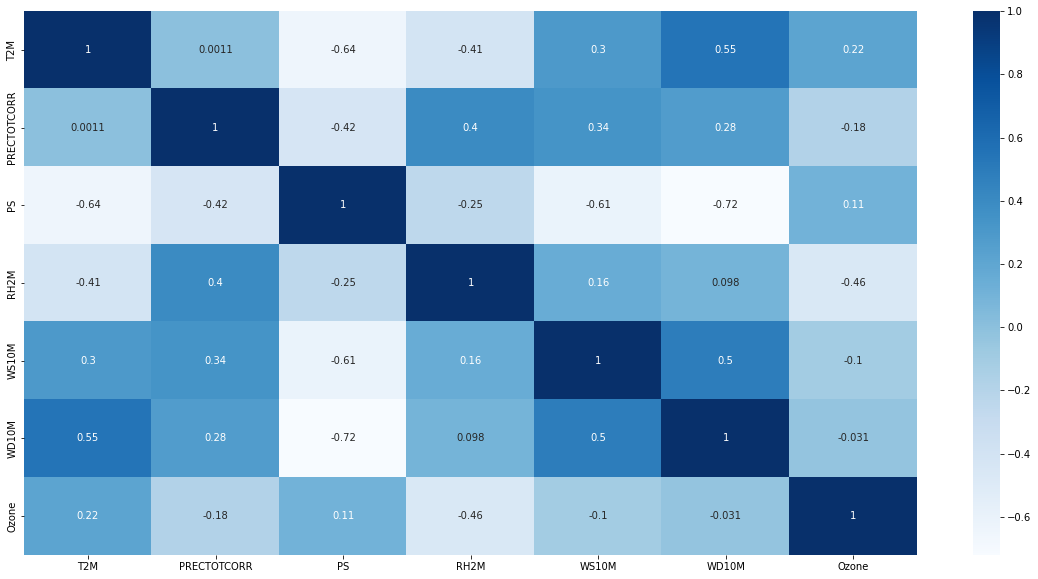

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(ozone.corr(), annot=True, cmap='Blues')

plt.show()

###independent and dependent variable

In [ ]:
 x=ozone.iloc[:,:-1]
y=ozone.iloc[:,-1]

In [ ]:
x

,T2M,PRECTOTCORR,PS,RH2M,WS10M,WD10M
0,23.26,0.00,98.55,35.38,1.84,144.25
1,23.38,0.00,98.53,33.19,1.52,137.00
2,21.19,0.00,98.45,32.56,2.90,62.69
3,20.94,0.00,98.51,35.06,2.67,86.00
4,21.66,0.00,98.41,30.44,1.73,108.44
...,...,...,...,...,...,...
1456,15.15,0.07,98.29,59.81,4.29,21.38
1457,11.83,0.00,98.43,57.94,3.41,68.00
1458,12.38,0.00,98.43,58.62,2.76,64.56
1459,14.22,0.10,98.35,66.81,2.78,75.00


In [ ]:
y

0       40.233607
1       40.233607
2       40.417543
3       40.601479
4       40.371559
          ...    
1456    31.131667
1457    38.072174
1458    32.526667
1459    28.711364
1460    40.805000
Name: Ozone, Length: 1419, dtype: float64

In [ ]:
#Train-Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

###Feature transformation

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt_x = PowerTransformer(method='yeo-johnson')
pt_y = PowerTransformer(method='yeo-johnson')
x_train = pt_x.fit_transform(x_train)
x_test = pt_x.transform(x_test)
y_train = pt_y.fit_transform(np.array(y_train).reshape(-1,1))
y_test = pt_y.transform(np.array(y_test).reshape(-1,1))

###SVR

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train,y_train)

SVR()

In [ ]:
y_prediction =  regressor.predict(x_test)
y_prediction

array([ 5.01529350e-01,  2.17069981e-01,  5.38433550e-01, -6.89058812e-01,
        1.27802565e-02,  2.58866176e-01, -6.96040949e-01,  2.46717407e-02,
       -4.16941374e-01,  4.79580068e-01, -1.85424706e-01,  6.69735070e-02,
        1.94794566e-01,  1.45222077e-01,  4.61298993e-01,  2.95649556e-01,
        1.89918292e-01, -1.21948833e+00,  2.02020036e-01,  1.61642680e-01,
        2.49159328e-01, -7.61336529e-01, -5.44347528e-01,  3.57437873e-01,
        1.49243364e-01,  7.76180367e-02, -9.24931886e-01,  3.76845768e-01,
       -7.08796932e-01, -5.08104478e-01, -7.59568457e-01, -5.79676266e-01,
       -2.02832211e-01, -2.31043336e-01,  3.35076274e-01,  7.45241077e-02,
       -1.41948801e-01,  2.78014248e-01,  1.91731401e-01, -1.20288841e+00,
       -9.02194472e-04, -1.07268989e+00,  1.25650100e-01, -8.27634255e-01,
        2.32889653e-01,  3.71676313e-01, -3.57809177e-01, -1.76465384e-02,
       -4.99817053e-01,  8.28730300e-02,  3.00694603e-01,  1.10097149e-01,
        5.77239496e-03, -

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
score = r2_score(y_test,y_prediction)
mean_error = mean_squared_error(y_test,y_prediction)
mae = mean_absolute_error(y_test,y_prediction)
print("R2 SCORE is", score)
print("mean_sqrd_error is ", mean_error)
print("Root mean squared error of is",np.sqrt(mean_error))
print("Mean Absolute error is", mae)

R2 SCORE is 0.23415108512098748
mean_sqrd_error is  0.7139888426494753
Root mean squared error of is 0.8449786048471732
Mean Absolute error is 0.5869468700108494


In [ ]:
y_test = pt_y.inverse_transform(y_test)
y_test[:5]

array([[38.39424444],
       [45.26886015],
       [46.50391304],
       [13.43875   ],
       [81.35      ]])

In [ ]:
y_prediction=y_prediction.reshape(-1,1)
y_prediction = pt_y.inverse_transform(y_prediction)
y_prediction[:5]

array([[51.73536874],
       [44.34491699],
       [52.73016564],
       [24.16806023],
       [39.34374326]])

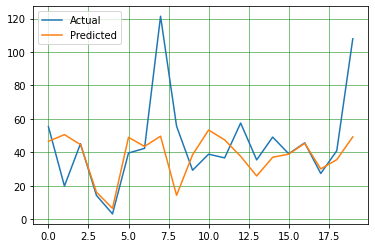

In [ ]:
df1 = pd.DataFrame({'Actual': y_test[100:120].flatten(), 'Predicted': y_prediction[100:120].flatten()})
df1.plot(kind='line')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
result = pd.DataFrame()
result["ACTUAL AQI"] = y_test.flatten()
result["PREDICTED AQI"] = y_prediction
result["DIFFERENCE"] = result["ACTUAL AQI"] - result["PREDICTED AQI"]
result["PERCENTAGE ERROR"] = ( abs(result["ACTUAL AQI"] - result["PREDICTED AQI"] ) / result["ACTUAL AQI"] ) * 100
result.head(15)

,ACTUAL AQI,PREDICTED AQI,DIFFERENCE,PERCENTAGE ERROR
0,38.394244,51.735369,-13.341124,34.747719
1,45.268860,44.344917,0.923943,2.041013
2,46.503913,52.730166,-6.226253,13.388664
3,13.438750,24.168060,-10.729310,79.838603
4,81.350000,39.343743,42.006257,51.636456
5,48.457083,45.399848,3.057235,6.309161
6,32.587917,24.033064,8.554852,26.251608
7,37.481133,39.627762,-2.146630,5.727228
8,23.453333,29.677326,-6.223993,26.537774
9,48.947584,51.147600,-2.200016,4.494636


###SVR using hyperparameter tunning

In [ ]:
##applying Gridsearchcv on SVR
svr=SVR(kernel='rbf')
grid_sv = GridSearchCV(svr, param_grid={"C": [0.1, 1, 10, 100, 1000], "gamma": [1, 0.1, 0.01, 0.001, 0.0001]}, scoring='r2', verbose=3)
grid_sv.fit(x_train, y_train)
print(grid_sv.best_score_)
print(grid_sv.best_estimator_)
print(grid_sv.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.174 total time=   0.2s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.201 total time=   0.1s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.202 total time=   0.1s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.214 total time=   0.1s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.173 total time=   0.1s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.186 total time=   0.1s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.181 total time=   0.1s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.210 total time=   0.1s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.235 total time=   0.1s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.212 total time=   0.1s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.013 total time=   0.1s
[CV 2/5] END .................C=0.1, gamma=0.01

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf', C=1000, gamma=0.01)
regressor.fit(x_train,y_train)

SVR(C=1000, gamma=0.01)

In [ ]:
y_prediction =  regressor.predict(x_test)
y_prediction

array([ 5.09937084e-01,  2.02059817e-01,  5.33554588e-01, -5.98930790e-01,
       -8.32688070e-03,  2.38392186e-01, -7.02631908e-01,  3.78112792e-02,
       -4.07503982e-01,  8.58375598e-01, -1.55883848e-01,  1.54866111e-01,
        2.55790555e-01,  1.52215379e-01,  4.73952638e-01,  3.07382456e-01,
        5.15995582e-01, -1.23942917e+00,  2.34064353e-01,  1.41765965e-01,
        2.25159136e-01, -7.77895843e-01, -4.51632613e-01,  5.06801656e-01,
        2.97261312e-01,  1.89145813e-01, -7.58839767e-01,  3.18833318e-01,
       -7.62424365e-01, -4.09006029e-01, -5.84818644e-01, -4.75800927e-01,
       -3.59780627e-01, -6.58059336e-01,  3.13806403e-01,  7.83567385e-02,
       -2.28798575e-01,  2.81594566e-01,  2.25039035e-01, -1.27246895e+00,
       -1.05546567e-01, -1.26331356e+00,  1.00768935e-01, -8.75408924e-01,
        1.95304118e-01,  4.79225224e-01, -2.41373508e-01,  1.52266544e-02,
       -6.65156305e-01,  1.05394699e-01,  2.77757008e-01,  1.97331547e-01,
       -2.72977577e-02, -

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
score = r2_score(y_test,y_prediction)
mean_error = mean_squared_error(y_test,y_prediction)
mae = mean_absolute_error(y_test,y_prediction)
print("R2 SCORE is", score)
print("mean_sqrd_error is ", mean_error)
print("Root mean squared error of is",np.sqrt(mean_error))
print("Mean Absolute error is", mae)

R2 SCORE is 0.20442446806281378
mean_sqrd_error is  0.7417024980414172
Root mean squared error of is 0.861221515082744
Mean Absolute error is 0.6100888549467981


In [ ]:
y_test = pt_y.inverse_transform(y_test)
y_test[:5]

array([[38.39424444],
       [45.26886015],
       [46.50391304],
       [13.43875   ],
       [81.35      ]])

In [ ]:
y_prediction=y_prediction.reshape(-1,1)
y_prediction = pt_y.inverse_transform(y_prediction)
y_prediction[:5]

array([[51.96128625],
       [43.96868167],
       [52.59817607],
       [25.93936783],
       [38.8417858 ]])

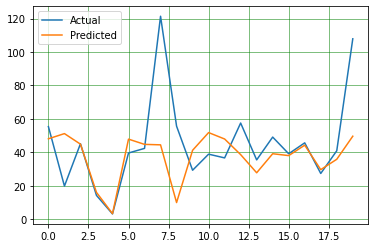

In [ ]:
df1 = pd.DataFrame({'Actual': y_test[100:120].flatten(), 'Predicted': y_prediction[100:120].flatten()})
df1.plot(kind='line')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
result = pd.DataFrame()
result["ACTUAL AQI"] = y_test.flatten()
result["PREDICTED AQI"] = y_prediction
result["DIFFERENCE"] = result["ACTUAL AQI"] - result["PREDICTED AQI"]
result["PERCENTAGE ERROR"] = ( abs(result["ACTUAL AQI"] - result["PREDICTED AQI"] ) / result["ACTUAL AQI"] ) * 100
result.head(15)

,ACTUAL AQI,PREDICTED AQI,DIFFERENCE,PERCENTAGE ERROR
0,38.394244,51.961286,-13.567042,35.336134
1,45.268860,43.968682,1.300178,2.872126
2,46.503913,52.598176,-6.094263,13.104839
3,13.438750,25.939368,-12.500618,93.019201
4,81.350000,38.841786,42.508214,52.253490
5,48.457083,44.881747,3.575337,7.378357
6,32.587917,23.905926,8.681990,26.641747
7,37.481133,39.942614,-2.461482,6.567255
8,23.453333,29.877002,-6.423669,27.389150
9,48.947584,61.696839,-12.749255,26.046750


###KNN

In [ ]:
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
hp_candidates = dict(n_neighbors=k_range, weights=weight_options)
knn = KNeighborsRegressor()
# Search for best hyperparameters
grid = GridSearchCV(estimator=knn, param_grid=hp_candidates, cv=5, scoring='r2')
grid.fit(x_train, y_train)
# Get the results
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.3009333623336675
KNeighborsRegressor(n_neighbors=21, weights='distance')
{'n_neighbors': 21, 'weights': 'distance'}


In [ ]:
regressor=KNeighborsRegressor(n_neighbors=21, weights='distance')
regressor.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=21, weights='distance')

In [ ]:
y_prediction =  regressor.predict(x_test)
y_prediction

array([[ 8.73485361e-01],
       [-5.18091512e-02],
       [ 6.20703128e-01],
       [-7.99306886e-01],
       [-1.15891543e-01],
       [ 7.26417049e-01],
       [-7.06582088e-01],
       [ 7.07193195e-01],
       [-4.66572220e-01],
       [ 1.96675197e-01],
       [-5.25104868e-02],
       [ 2.78027440e-01],
       [ 4.95244719e-01],
       [ 2.44865164e-01],
       [ 4.62413871e-01],
       [ 7.05127400e-01],
       [ 5.98844080e-01],
       [-1.34174923e+00],
       [ 1.04534243e-02],
       [ 5.60354530e-01],
       [ 5.28970644e-01],
       [-7.42948424e-01],
       [-5.39884950e-01],
       [-1.14176240e-01],
       [ 4.33425818e-01],
       [ 5.25300917e-01],
       [-1.11056764e+00],
       [ 8.23646639e-01],
       [-3.25664598e-01],
       [-4.66657030e-01],
       [-7.55597492e-01],
       [-9.25508192e-01],
       [-2.37725378e-01],
       [-2.18962080e-01],
       [ 6.92098912e-01],
       [ 4.16485177e-02],
       [ 1.38515654e-01],
       [ 4.24808497e-01],
       [ 5.0

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
score = r2_score(y_test,y_prediction)
mean_error = mean_squared_error(y_test,y_prediction)
mae = mean_absolute_error(y_test,y_prediction)
print("R2 SCORE is", score)
print("mean_sqrd_error is ", mean_error)
print("Root mean squared error of is",np.sqrt(mean_error))
print("Mean Absolute error is", mae)

R2 SCORE is 0.2521119735368742
mean_sqrd_error is  0.697244190167933
Root mean squared error of is 0.8350114910394545
Mean Absolute error is 0.6433077893256816


In [ ]:
y_test = pt_y.inverse_transform(y_test)
y_test[:5]

array([[38.39424444],
       [45.26886015],
       [46.50391304],
       [13.43875   ],
       [81.35      ]])

In [ ]:
y_prediction=y_prediction.reshape(-1,1)
y_prediction = pt_y.inverse_transform(y_prediction)
y_prediction[:5]

array([[62.13537557],
       [37.81648367],
       [54.97736422],
       [22.07407126],
       [36.32701833]])

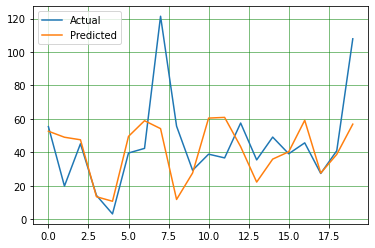

In [ ]:
df1 = pd.DataFrame({'Actual': y_test[100:120].flatten(), 'Predicted': y_prediction[100:120].flatten()})
df1.plot(kind='line')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
result = pd.DataFrame()
result["ACTUAL AQI"] = y_test.flatten()
result["PREDICTED AQI"] = y_prediction
result["DIFFERENCE"] = result["ACTUAL AQI"] - result["PREDICTED AQI"]
result["PERCENTAGE ERROR"] = ( abs(result["ACTUAL AQI"] - result["PREDICTED AQI"] ) / result["ACTUAL AQI"] ) * 100
result.head(15)

,ACTUAL AQI,PREDICTED AQI,DIFFERENCE,PERCENTAGE ERROR
0,38.394244,62.135376,-23.741131,61.835130
1,45.268860,37.816484,7.452376,16.462479
2,46.503913,54.977364,-8.473451,18.220942
3,13.438750,22.074071,-8.635321,64.256878
4,81.350000,36.327018,45.022982,55.344784
5,48.457083,57.924531,-9.467447,19.537799
6,32.587917,23.829866,8.758051,26.875149
7,37.481133,57.383625,-19.902493,53.100030
8,23.453333,28.636677,-5.183343,22.100668
9,48.947584,43.834052,5.113532,10.446955


###Random forest

In [ ]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [ ]:
## Importing Random Forest Classifier from the sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [ ]:


from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)



In [ ]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [ ]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 120, 'bootstrap': True}  



In [ ]:
regressor = RandomForestRegressor(n_estimators = 100, min_samples_split = 2, min_samples_leaf= 1, max_features = 'sqrt', max_depth= 120, bootstrap=True) 
regressor.fit( x_train, y_train) 

RandomForestRegressor(max_depth=120, max_features='sqrt')

In [ ]:


y_prediction =  regressor.predict(x_test)
y_prediction 



array([ 0.62998552,  0.22965716,  0.60478896, -0.56582967, -0.14344532,
        0.91789589, -0.8864955 ,  0.45696637, -0.4337366 ,  0.51760264,
       -0.14274162,  0.04936032,  0.40636419,  0.20738752,  0.47624446,
        0.58694617,  0.81337596, -1.15963096,  0.14301942,  0.33213827,
        0.82451658, -0.63951088, -0.36531654, -0.11168981,  0.87035901,
        0.41054111, -1.10294661,  0.81835192, -0.87474707, -0.22124163,
       -1.39555703, -0.51870037, -0.45227333, -0.24012481,  0.61525474,
        0.01628876,  0.63134183,  0.84227517,  0.74069066, -0.80059028,
        0.0249953 , -1.55188875,  0.4614298 , -1.15063347,  0.37229007,
       -0.04322087, -0.38045136, -0.18658428,  0.10201139,  0.2317417 ,
        1.00604649,  0.1990055 ,  0.24938074,  0.01661149,  0.20988708,
        0.59665821,  0.40044393, -0.73419825, -1.07754014, -1.24635923,
        0.03119887,  0.21719209,  0.123417  , -0.56869213, -0.02079569,
       -0.71466691, -0.29061537,  0.27124099, -1.33738042,  0.51

In [ ]:

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
score = r2_score(y_test,y_prediction)
mean_error = mean_squared_error(y_test,y_prediction)
mae = mean_absolute_error(y_test,y_prediction)
print("R2 SCORE is", score)
print("mean_sqrd_error is ", mean_error)
print("Root mean squared error of is",np.sqrt(mean_error))
print("Mean Absolute error is", mae)

R2 SCORE is 0.3316784693487923
mean_sqrd_error is  0.6230656033021406
Root mean squared error of is 0.7893450470498568
Mean Absolute error is 0.5876521437714032


In [ ]:
y_test = pt_y.inverse_transform(y_test)
y_test[:5]

array([[38.39424444],
       [45.26886015],
       [46.50391304],
       [13.43875   ],
       [81.35      ]])

In [ ]:
y_prediction=y_prediction.reshape(-1,1)
y_prediction = pt_y.inverse_transform(y_prediction)
y_prediction[:5]

array([[55.23346591],
       [44.66148701],
       [54.53949409],
       [26.6032519 ],
       [35.69451769]])

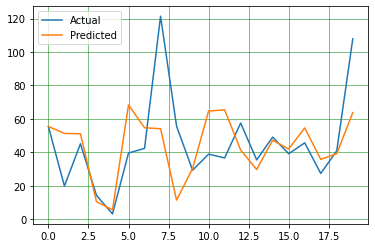

In [ ]:
df1 = pd.DataFrame({'Actual': y_test[100:120].flatten(), 'Predicted': y_prediction[100:120].flatten()})
df1.plot(kind='line')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
result = pd.DataFrame()
result["ACTUAL AQI"] = y_test.flatten()
result["PREDICTED AQI"] = y_prediction
result["DIFFERENCE"] = result["ACTUAL AQI"] - result["PREDICTED AQI"]
result["PERCENTAGE ERROR"] = ( abs(result["ACTUAL AQI"] - result["PREDICTED AQI"] ) / result["ACTUAL AQI"] ) * 100
result.head(15)

,ACTUAL AQI,PREDICTED AQI,DIFFERENCE,PERCENTAGE ERROR
0,38.394244,55.233466,-16.839221,43.858713
1,45.268860,44.661487,0.607373,1.341702
2,46.503913,54.539494,-8.035581,17.279365
3,13.438750,26.603252,-13.164502,97.959274
4,81.350000,35.694518,45.655482,56.122289
5,48.457083,63.432134,-14.975051,30.903740
6,32.587917,20.475243,12.112674,37.169218
7,37.481133,50.545087,-13.063955,34.854750
8,23.453333,29.323390,-5.870057,25.028668
9,48.947584,52.167633,-3.220049,6.578566


###Without tunning

In [ ]:


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

fs = SelectKBest(score_func=mutual_info_regression, k='all')
fs.fit(x_train, y_train)
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)



In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(x_train_fs,y_train)

RandomForestRegressor()

In [ ]:


y_prediction =  regressor.predict(x_test_fs)
y_prediction 



array([ 6.95644396e-01,  1.18896878e-01,  5.42684623e-01, -8.56164366e-01,
       -1.02973274e-01,  9.98362940e-01, -8.27068661e-01,  3.70996902e-01,
       -4.57469851e-01,  4.84505983e-01, -1.42964733e-01,  2.80873591e-02,
        5.72522183e-01,  2.13524354e-01,  4.71392797e-01,  5.16621606e-01,
        1.00537323e+00, -1.20300863e+00,  1.78852959e-01,  2.73322750e-01,
        8.68379210e-01, -6.87663544e-01, -4.24599652e-01, -1.82001733e-01,
        7.84332710e-01,  3.47941959e-01, -1.22103941e+00,  6.87050290e-01,
       -9.95567860e-01, -4.15352401e-02, -1.37047104e+00, -3.04654768e-01,
       -1.82459716e-01, -2.29211352e-01,  7.94381944e-01,  2.85263802e-02,
        7.41193877e-01,  5.14679527e-01,  6.58662714e-01, -8.59530666e-01,
        1.55642405e-01, -1.75320979e+00,  3.57697810e-01, -1.16417049e+00,
        3.58265849e-01, -1.45334271e-01, -4.11474626e-01, -2.19193182e-01,
        1.80423721e-01,  2.39623392e-01,  1.07741879e+00,  2.94984572e-01,
        4.03999076e-01, -

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
score = r2_score(y_test,y_prediction)
mean_error = mean_squared_error(y_test,y_prediction)
mae = mean_absolute_error(y_test,y_prediction)
print("R2 SCORE is", score)
print("mean_sqrd_error is ", mean_error)
print("Root mean squared error of is",np.sqrt(mean_error))
print("Mean Absolute error is", mae)

R2 SCORE is 0.31456268233751705
mean_sqrd_error is  0.6390223810970741
Root mean squared error of is 0.7993887546726399
Mean Absolute error is 0.5931195922962234


In [ ]:
y_test = pt_y.inverse_transform(y_test)
y_test[:5]

array([[38.39424444],
       [45.26886015],
       [46.50391304],
       [13.43875   ],
       [81.35      ]])

In [ ]:
y_prediction=y_prediction.reshape(-1,1)
y_prediction = pt_y.inverse_transform(y_prediction)
y_prediction[:5]

array([[57.05973516],
       [41.90932838],
       [52.84528602],
       [21.02568387],
       [36.62520319]])

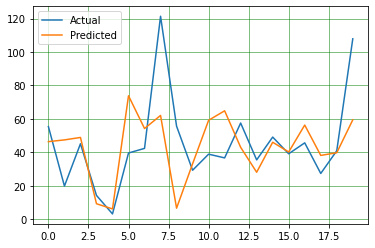

In [ ]:
df1 = pd.DataFrame({'Actual': y_test[100:120].flatten(), 'Predicted': y_prediction[100:120].flatten()})
df1.plot(kind='line')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
result = pd.DataFrame()
result["ACTUAL AQI"] = y_test.flatten()
result["PREDICTED AQI"] = y_prediction
result["DIFFERENCE"] = result["ACTUAL AQI"] - result["PREDICTED AQI"]
result["PERCENTAGE ERROR"] = ( abs(result["ACTUAL AQI"] - result["PREDICTED AQI"] ) / result["ACTUAL AQI"] ) * 100
result.head(15)

,ACTUAL AQI,PREDICTED AQI,DIFFERENCE,PERCENTAGE ERROR
0,38.394244,57.059735,-18.665491,48.615335
1,45.268860,41.909328,3.359532,7.421286
2,46.503913,52.845286,-6.341373,13.636214
3,13.438750,21.025684,-7.586934,56.455652
4,81.350000,36.625203,44.724797,54.978238
5,48.457083,65.811356,-17.354273,35.813697
6,32.587917,21.559483,11.028433,33.842093
7,37.481133,48.282848,-10.801715,28.819074
8,23.453333,28.826344,-5.373011,22.909369
9,48.947584,51.279255,-2.331671,4.763608


###Gradient boost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()
regressor.fit(x_train,y_train)

GradientBoostingRegressor()

In [ ]:


y_prediction =  regressor.predict(x_test)
y_prediction 



array([ 5.22587200e-01, -2.48728435e-01,  5.44612471e-01, -8.52774464e-01,
        4.20921745e-02,  4.32382402e-01, -6.60146308e-01,  4.28391965e-01,
       -4.73480620e-01,  4.12496979e-01, -1.39843516e-01,  2.02503182e-01,
        4.78210761e-01,  4.32093338e-01,  2.12688194e-01,  5.22568776e-01,
        6.83810725e-01, -1.14808219e+00,  5.18231271e-02,  2.72610586e-01,
        1.09754736e+00, -5.29280133e-01, -4.75544834e-01, -1.22155820e-01,
        8.50686262e-01,  6.66752409e-01, -8.51026020e-01,  5.34940596e-01,
       -5.70836951e-01, -2.56562427e-01, -1.00183208e+00, -5.79814059e-01,
       -3.51078136e-01, -5.31837981e-01,  5.96834558e-01,  1.53167759e-01,
        9.56020709e-02,  6.70029291e-01,  6.58348159e-01, -1.32544724e+00,
       -1.46842935e-01, -1.85884134e+00,  3.67679896e-01, -1.46948634e+00,
        1.99650314e-01, -2.93404698e-02, -2.57478425e-01, -2.08908194e-01,
       -4.45460151e-01,  5.63471358e-01,  1.15469867e+00,  2.39395819e-01,
        3.93125825e-01, -

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
score = r2_score(y_test,y_prediction)
mean_error = mean_squared_error(y_test,y_prediction)
mae = mean_absolute_error(y_test,y_prediction)
print("R2 SCORE is", score)
print("mean_sqrd_error is ", mean_error)
print("Root mean squared error of is",np.sqrt(mean_error))
print("Mean Absolute error is", mae)

R2 SCORE is 0.2887126394387757
mean_sqrd_error is  0.663121967651463
Root mean squared error of is 0.8143230118641269
Mean Absolute error is 0.6243860624785905


In [ ]:
y_test = pt_y.inverse_transform(y_test)
y_test[:5]

array([[38.39424444],
       [45.26886015],
       [46.50391304],
       [13.43875   ],
       [81.35      ]])

In [ ]:
y_prediction=y_prediction.reshape(-1,1)
y_prediction = pt_y.inverse_transform(y_prediction)
y_prediction[:5]

array([[52.30200156],
       [33.32186859],
       [52.89752867],
       [21.08758523],
       [40.04542568]])

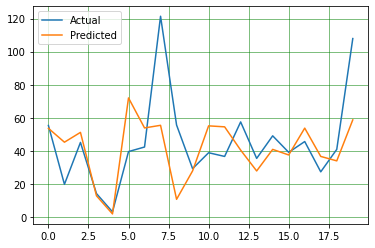

In [ ]:
df1 = pd.DataFrame({'Actual': y_test[100:120].flatten(), 'Predicted': y_prediction[100:120].flatten()})
df1.plot(kind='line')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:


result = pd.DataFrame()
result["ACTUAL AQI"] = y_test.flatten()
result["PREDICTED AQI"] = y_prediction
result["DIFFERNCE"] = result["ACTUAL AQI"] - result["PREDICTED AQI"]
result["PERCENTAGE ERROR"] = ( abs(result["ACTUAL AQI"] - result["PREDICTED AQI"] ) / result["ACTUAL AQI"] ) * 100
result.head(15)



,ACTUAL AQI,PREDICTED AQI,DIFFERNCE,PERCENTAGE ERROR
0,38.394244,52.302002,-13.907757,36.223547
1,45.268860,33.321869,11.946992,26.391191
2,46.503913,52.897529,-6.393616,13.748554
3,13.438750,21.087585,-7.648835,56.916270
4,81.350000,40.045426,41.304574,50.773908
5,48.457083,49.893593,-1.436510,2.964499
6,32.587917,24.730481,7.857436,24.111502
7,37.481133,49.788189,-12.307057,32.835339
8,23.453333,28.493083,-5.039749,21.488413
9,48.947584,49.369296,-0.421712,0.861558


###Ensembling approach

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:

rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
svr = SVR()

In [ ]:
estimators = [('rf',rf),('gb',gb),('svr',svr)]

In [ ]:


for estimator in estimators:
  scores = cross_val_score(estimator[1],x_train,y_train,scoring='r2',cv=10)
  print(estimator[0],np.round(np.mean(scores),2))



rf 0.33
gb 0.3
svr 0.27


In [ ]:

from sklearn.ensemble import VotingRegressor
vr = VotingRegressor(estimators)
scores = cross_val_score(vr,x_train,y_train,scoring='r2',cv=10)
print("Voting Regressor",np.round(np.mean(scores),2))

Voting Regressor 0.34


In [ ]:
vr.fit(x_train,y_train)

VotingRegressor(estimators=[('rf', RandomForestRegressor()),
                            ('gb', GradientBoostingRegressor()),
                            ('svr', SVR())])

In [ ]:


y_prediction =  vr.predict(x_test)
y_prediction 



array([ 5.79217424e-01,  6.37091798e-02,  5.57697341e-01, -6.99754805e-01,
        1.20201769e-02,  4.64039976e-01, -7.37161251e-01,  2.65376708e-01,
       -4.77724089e-01,  3.77531078e-01, -1.41864610e-01,  1.59568342e-01,
        3.88786581e-01,  2.88846867e-01,  4.15784948e-01,  4.29621995e-01,
        6.40221794e-01, -1.15152267e+00,  1.74251792e-01,  2.16282438e-01,
        7.31103502e-01, -6.05416266e-01, -4.40124829e-01,  3.14541073e-02,
        6.57753808e-01,  4.06553921e-01, -1.02314974e+00,  4.77197431e-01,
       -7.46224581e-01, -2.73465247e-01, -1.01230887e+00, -4.68153701e-01,
       -2.83138122e-01, -3.57051063e-01,  4.71239715e-01,  8.08180061e-02,
        1.99388792e-01,  4.57489597e-01,  5.17689975e-01, -1.06265817e+00,
       -4.56631927e-02, -1.58873689e+00,  3.69355388e-01, -1.18224691e+00,
        3.21532097e-01,  2.68471979e-02, -2.69061051e-01, -1.63440042e-01,
       -2.69659849e-01,  2.69741992e-01,  9.10648933e-01,  2.01943866e-01,
        2.60511328e-01, -

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
score = r2_score(y_test,y_prediction)
mean_error = mean_squared_error(y_test,y_prediction)
mae = mean_absolute_error(y_test,y_prediction)
print("R2 SCORE is", score)
print("mean_sqrd_error is ", mean_error)
print("Root mean squared error of is",np.sqrt(mean_error))
print("Mean Absolute error is", mae)

R2 SCORE is 0.30870005286434365
mean_sqrd_error is  0.6444880179232293
Root mean squared error of is 0.802800110814161
Mean Absolute error is 0.5909031249711354


In [ ]:
y_test = pt_y.inverse_transform(y_test)
y_test[:5]

array([[38.39424444],
       [45.26886015],
       [46.50391304],
       [13.43875   ],
       [81.35      ]])

In [ ]:
y_prediction=y_prediction.reshape(-1,1)
y_prediction = pt_y.inverse_transform(y_prediction)
y_prediction[:5]

array([[53.83909241],
       [40.56632755],
       [53.2527064 ],
       [23.96138984],
       [39.32561929]])

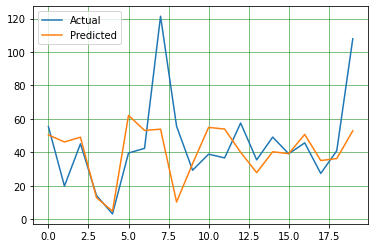

In [ ]:
df1 = pd.DataFrame({'Actual': y_test[100:120].flatten(), 'Predicted': y_prediction[100:120].flatten()})
df1.plot(kind='line')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:


result = pd.DataFrame()
result["ACTUAL AQI"] = y_test.flatten()
result["PREDICTED AQI"] = y_prediction
result["DIFFERNCE"] = result["ACTUAL AQI"] - result["PREDICTED AQI"]
result["PERCENTAGE ERROR"] = ( abs(result["ACTUAL AQI"] - result["PREDICTED AQI"] ) / result["ACTUAL AQI"] ) * 100
result.head(15)



,ACTUAL AQI,PREDICTED AQI,DIFFERNCE,PERCENTAGE ERROR
0,38.394244,53.839092,-15.444848,40.226988
1,45.268860,40.566328,4.702533,10.388008
2,46.503913,53.252706,-6.748793,14.512313
3,13.438750,23.961390,-10.522640,78.300734
4,81.350000,39.325619,42.024381,51.658735
5,48.457083,50.733222,-2.276138,4.697225
6,32.587917,23.244546,9.343371,28.671274
7,37.481133,45.565138,-8.084005,21.568199
8,23.453333,28.405033,-4.951700,21.112989
9,48.947584,48.453214,0.494370,1.010000
